In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")

In [2]:
df_tank = pd.read_csv("Tanks-1.csv")
df_location = pd.read_csv("Locations-1.csv")
df_invoice = pd.read_csv("Invoices-1.csv")
df_fuel_2 = pd.read_csv("Fuel_Level_Part_2-1.csv")
df_fuel_1 = pd.read_csv("Fuel_Level_Part_1-1.csv")

In [3]:
# Create a dataset with Canada CPI values 
cpi_values = [173.1,173.2,173.4,173.6,173.9,174.1,174.4,174.7,174.9,175.2,175.6,175.9,176.3,176.5,176.7,176.9,177.1,177.4,177.7,178.1,178.2,178.6,178.8,179.1,179.4,179.9,180.3,180.4,180.8,181.0,181.3,181.6]

dates = pd.date_range(start = "2017-01-01", end = "2019-08-01", freq = 'MS')

df_cpi = pd.DataFrame({'Date': dates, 'CPI': cpi_values})


In [4]:
df_tank

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity
0,T 10,1,1,U,40000
1,T 11,1,2,U,40000
2,T 12,1,3,D,40000
3,T 13,1,4,P,40000
4,T 14,1,5,U,40000
5,T 15,1,6,D,40000
6,T 16,2,1,U,70000
7,T 17,2,2,D,40000
8,T 18,2,3,U,40000
9,T 19,2,4,D,70000


In [5]:
df_location

,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude
0,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23,-79.84
1,2,Eastgate,"75 Centennial Pkwy N E5, Hamilton, ON L8E 2P2,...",43.23,-79.76
2,3,Central,"80 Park St N, Hamilton, ON L8R 2M9, Canada",43.26,-79.87
3,4,Chedoke,"16 McMaster Ave, Dundas, ON L9H 0A8, Canada",43.26,-79.94
4,5,Mountain View,"985 Scenic Dr, Hamilton, ON L9C 1H7, Canada",43.24,-79.92
5,6,Oakville,"503 Plains Rd E, Burlington, ON L7T 2E2, Canada",43.32,-79.84
6,7,Circle,"1170 Upper James St, Hamilton, ON L9C 3B1, Canada",43.22,-79.89
7,8,Chappel,"1530 Upper Sherman Ave, Hamilton, ON L8W 1C5, ...",38.88,-77.02


In [6]:
df_invoice.head(20)

,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,1/2/2017,10000.00,1,7570.82,6609.60,G
1,1/2/2017,10001.00,1,12491.85,9338.74,D
2,1/2/2017,10002.00,1,NaN,NaN,NaN
3,1/2/2017,10002.00,2,17034.35,13377.82,D
4,1/2/2017,NaN,2,NaN,NaN,NaN
5,1/2/2017,10003.00,2,12616.77,9432.11,D
6,1/2/2017,10004.00,4,11363.80,9139.20,D
7,1/2/2017,10005.00,5,9573.30,7156.86,D
8,1/3/2017,10006.00,1,5670.54,4239.22,D
9,1/3/2017,10007.00,1,7627.60,6659.18,G


In [7]:
print(df_fuel_1.shape, df_fuel_2.shape)
print(df_fuel_1.head(), df_fuel_2.head())

(885151, 3) (974509, 3)
  Tank ID  Fuel Level     Time stamp
0    T 12    27161.00  1/1/2017 0:10
1    T 12    27017.00  1/1/2017 0:25
2    T 12    26934.00  1/1/2017 0:40
3     T12         NaN  1/1/2017 0:45
4    T 12    26786.00  1/1/2017 0:55   Tank ID  Fuel_Level      Timestamp
0    T 32       22327  1/1/2017 0:05
1    T 20       25215  1/1/2017 0:07
2    T 10       25700  1/1/2017 0:09
3    T 11       25685  1/1/2017 0:10
4    T 14       27138  1/1/2017 0:10


In [8]:
df_fuel_1 = df_fuel_1.rename(columns = {"Fuel Level" : "Fuel_Level", "Time stamp" : "Timestamp"})

In [9]:
df_fuel_1.head()

,Tank ID,Fuel_Level,Timestamp
0,T 12,27161.00,1/1/2017 0:10
1,T 12,27017.00,1/1/2017 0:25
2,T 12,26934.00,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.00,1/1/2017 0:55


In [10]:
df_fuel = pd.concat([df_fuel_1, df_fuel_2], axis = 0, ignore_index = True)
print(df_fuel.shape)
df_fuel.tail()
# Check the union of two datasets is successful

(1859660, 3)


,Tank ID,Fuel_Level,Timestamp
1859655,T 32,27619.00,8/15/2019 23:53
1859656,T 22,31548.00,8/15/2019 23:57
1859657,T 16,53492.00,8/15/2019 23:57
1859658,T 18,27081.00,8/15/2019 23:57
1859659,T 25,11815.00,8/15/2019 23:59


In [11]:
df_tank.info()
df_invoice.info()
df_location.info()
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tank ID        23 non-null     object
 1   Tank Location  23 non-null     int64 
 2   Tank Number    23 non-null     int64 
 3   Tank Type      23 non-null     object
 4   Tank Capacity  23 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Invoice Date                  2873 non-null   object 
 1   Invoice ID                    2832 non-null   float64
 2   Invoice Gas Station Location  2873 non-null   int64  
 3   Gross Purchase Cost           2831 non-null   float64
 4   Amount Purchased              2831 non-null   float64
 5   Fuel Type              

In [12]:
missing_values_invoice = df_invoice.isnull().sum()
print("Missing values in df_invoice:")
print(missing_values_invoice)
missing_values_fuel = df_fuel.isnull().sum()
print("\nMissing values in df_fuel:")
print(missing_values_fuel)

Missing values in df_invoice:
Invoice Date                     0
Invoice ID                      41
Invoice Gas Station Location     0
Gross Purchase Cost             42
Amount Purchased                42
Fuel Type                       42
dtype: int64

Missing values in df_fuel:
Tank ID       0
Fuel_Level    2
Timestamp     0
dtype: int64


In [13]:
### Try to forward fill using previous fuel level of the same tank
df_fuel.sort_values(['Tank ID', 'Timestamp'], inplace=True)
df_fuel['Fuel_Level'] = df_fuel.groupby('Tank ID')['Fuel_Level'].fillna(method='ffill')
df_fuel['Fuel_Level'].isnull().sum()
### Still 2, means it is very likely that the grouped fuel level starts with na.

2

In [14]:
print(df_fuel)
# As expected
print(df_fuel.loc[df_fuel["Tank ID"] == "T12"])
print(df_fuel.loc[df_fuel["Tank ID"] == "T 12"])
# Further prints reveal that the na is due to a mismatch in Tank ID
# So we correct the Tank ID and apply the ffill
df_fuel['Tank ID'] = df_fuel['Tank ID'].replace('T12', 'T 12')
df_fuel.sort_values(['Tank ID', 'Timestamp'], inplace=True)
df_fuel['Fuel_Level'] = df_fuel.groupby('Tank ID')['Fuel_Level'].fillna(method='ffill')
df_fuel['Fuel_Level'].isnull().sum()

        Tank ID  Fuel_Level       Timestamp
885153     T 10    25700.00   1/1/2017 0:09
885164     T 10    25666.00   1/1/2017 0:24
885174     T 10    25624.00   1/1/2017 0:39
885185     T 10    25560.00   1/1/2017 0:54
885582     T 10    24080.00  1/1/2017 10:09
...         ...         ...             ...
1484961    T 32    24239.00   9/9/2018 9:28
1484973    T 32    24239.00   9/9/2018 9:43
1484985    T 32    24239.00   9/9/2018 9:58
3           T12         NaN   1/1/2017 0:45
111         T12         NaN   1/2/2017 3:35

[1859660 rows x 3 columns]
    Tank ID  Fuel_Level      Timestamp
3       T12         NaN  1/1/2017 0:45
111     T12         NaN  1/2/2017 3:35
      Tank ID  Fuel_Level       Timestamp
0        T 12    27161.00   1/1/2017 0:10
1        T 12    27017.00   1/1/2017 0:25
2        T 12    26934.00   1/1/2017 0:40
4        T 12    26786.00   1/1/2017 0:55
41       T 12    25987.00  1/1/2017 10:10
...       ...         ...             ...
54653    T 12    25431.00   9/9/2

0

In [15]:
# For invoices we simply drop all na because filling them with 
# hypothetical values may contaminate the data
# Although it is possible to figure out the missging values by 
# going over the fuel level change and tank data, only 42 entries
# does not seemd to worth the work.
df_invoice = df_invoice.dropna()
print(df_invoice.isna().sum())

Invoice Date                    0
Invoice ID                      0
Invoice Gas Station Location    0
Gross Purchase Cost             0
Amount Purchased                0
Fuel Type                       0
dtype: int64


In [16]:
df_tank.describe()

,Tank Location,Tank Number,Tank Capacity
count,23.00,23.00,23.00
mean,3.74,2.26,36086.96
std,2.47,1.39,14844.38
min,1.00,1.00,5000.00
25%,1.50,1.00,30000.00
50%,3.00,2.00,40000.00
75%,6.00,3.00,40000.00
max,8.00,6.00,70000.00


In [17]:
df_invoice.describe()

,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased
count,2831.00,2831.00,2831.00,2831.00
mean,11415.00,2.31,11762.18,10270.82
std,817.38,1.69,6562.63,6101.91
min,10000.00,1.00,94.64,96.98
25%,10707.50,1.00,8327.90,7073.38
50%,11415.00,2.00,10459.09,9262.30
75%,12122.50,4.00,12518.35,11435.98
max,12830.00,8.00,33118.55,33826.56


In [18]:
df_fuel.describe()

,Fuel_Level
count,1859660.00
mean,25615.23
std,14032.32
min,1484.00
25%,18314.00
50%,24912.00
75%,30420.00
max,69531.00


In [19]:
# We don't need minute-level fuel level data. So we only kept last value for every day
df_fuel['Timestamp'] = pd.to_datetime(df_fuel['Timestamp'])
df_fuel['Date'] = df_fuel['Timestamp'].dt.date
df_fuel_day = df_fuel.groupby(['Tank ID', 'Date']).last().reset_index()
df_fuel_day.drop('Timestamp', axis=1, inplace=True)
df_fuel_day.head()

,Tank ID,Date,Fuel_Level
0,T 10,2017-01-01,24080.00
1,T 10,2017-01-02,19408.00
2,T 10,2017-01-03,14188.00
3,T 10,2017-01-04,28951.00
4,T 10,2017-01-05,23122.00


In [20]:
df_fuel_tank = pd.merge(df_fuel_day, df_tank, on = 'Tank ID', how = 'left')

In [21]:
df_fuel_tank.head()

,Tank ID,Date,Fuel_Level,Tank Location,Tank Number,Tank Type,Tank Capacity
0,T 10,2017-01-01,24080.00,1,1,U,40000
1,T 10,2017-01-02,19408.00,1,1,U,40000
2,T 10,2017-01-03,14188.00,1,1,U,40000
3,T 10,2017-01-04,28951.00,1,1,U,40000
4,T 10,2017-01-05,23122.00,1,1,U,40000


In [22]:
df_fuel_agg = df_fuel_tank.groupby(['Date', 'Tank Type', 'Tank Location'])['Fuel_Level'].sum().reset_index()
df_fuel_agg.rename(columns={'Fuel_Level': 'Total_Fuel_Level'}, inplace=True)
df_fuel_agg.tail(10)

,Date,Tank Type,Tank Location,Total_Fuel_Level
14475,2019-08-15,D,6,24746.00
14476,2019-08-15,D,7,3052.00
14477,2019-08-15,D,8,33763.00
14478,2019-08-15,U,2,82478.00
14479,2019-08-15,U,3,20169.00
14480,2019-08-15,U,4,33755.00
14481,2019-08-15,U,5,13428.00
14482,2019-08-15,U,6,36496.00
14483,2019-08-15,U,7,1490.00
14484,2019-08-15,U,8,28107.00


In [23]:
grouped_stats = df_fuel_agg.groupby(['Tank Type', 'Tank Location'])['Total_Fuel_Level'].agg(['mean', 'min', 'count']).reset_index()

print(grouped_stats)

   Tank Type  Tank Location     mean      min  count
0          D              1 56856.54 34884.00    882
1          D              2 88354.75 67949.00    914
2          D              3 19726.65  8688.00    718
3          D              4 27798.29 14260.00    881
4          D              5 16873.37  8238.00    913
5          D              6 22470.72 14696.00    901
6          D              7  3508.87  1684.00    737
7          D              8 27214.36 13405.00    839
8          P              1 12858.62  5039.00    882
9          U              1 72314.67 41233.00    882
10         U              2 88320.00 65159.00    914
11         U              3 20598.74  9036.00    718
12         U              4 28456.92 18723.00    881
13         U              5 15268.89  4865.00    913
14         U              6 42814.05 23191.00    901
15         U              7  3032.12  1484.00    737
16         U              8 24891.77  5811.00    872


In [24]:
df_unique_tanks = df_fuel_tank.drop_duplicates(subset=['Tank ID'])
df_total_capacity = df_unique_tanks.groupby(['Tank Type', 'Tank Location'])['Tank Capacity'].sum().reset_index()
df_total_capacity.rename(columns={'Tank Capacity': 'Total_Capacity'}, inplace=True)
print(df_total_capacity)

   Tank Type  Tank Location  Total_Capacity
0          D              1           80000
1          D              2          110000
2          D              3           30000
3          D              4           40000
4          D              5           25000
5          D              6           30000
6          D              7            5000
7          D              8           40000
8          P              1           40000
9          U              1          120000
10         U              2          110000
11         U              3           30000
12         U              4           40000
13         U              5           25000
14         U              6           60000
15         U              7            5000
16         U              8           40000


In [25]:
merged_df = pd.merge(grouped_stats, df_total_capacity, on=['Tank Type', 'Tank Location'], how='left')
merged_df.head(20)

,Tank Type,Tank Location,mean,min,count,Total_Capacity
0,D,1,56856.54,34884.00,882,80000
1,D,2,88354.75,67949.00,914,110000
2,D,3,19726.65,8688.00,718,30000
3,D,4,27798.29,14260.00,881,40000
4,D,5,16873.37,8238.00,913,25000
5,D,6,22470.72,14696.00,901,30000
6,D,7,3508.87,1684.00,737,5000
7,D,8,27214.36,13405.00,839,40000
8,P,1,12858.62,5039.00,882,40000
9,U,1,72314.67,41233.00,882,120000


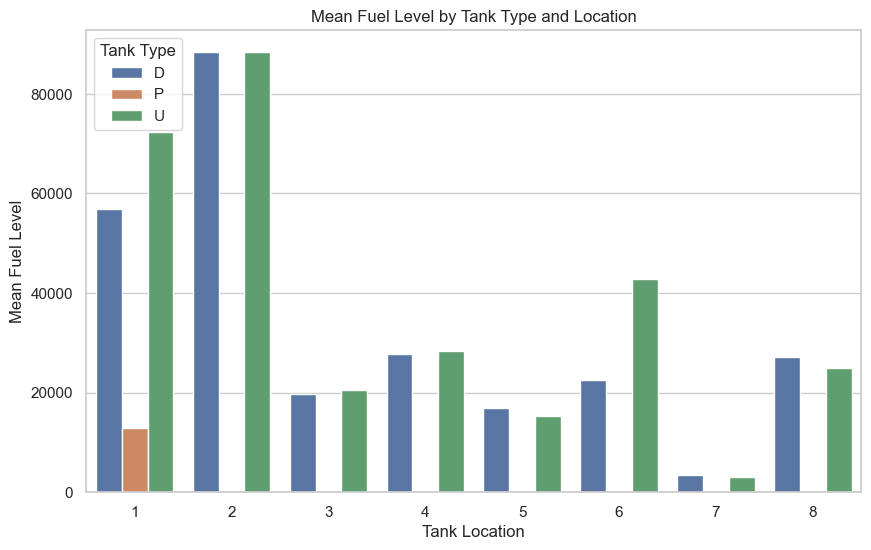

In [26]:
# Mean Fuel Level by Tank Type and Location
plt.figure(figsize=(10, 6))
sns.barplot(x='Tank Location', y='mean', hue='Tank Type', data=merged_df)
plt.title('Mean Fuel Level by Tank Type and Location')
plt.xlabel('Tank Location')
plt.ylabel('Mean Fuel Level')
plt.legend(title='Tank Type')
plt.show()

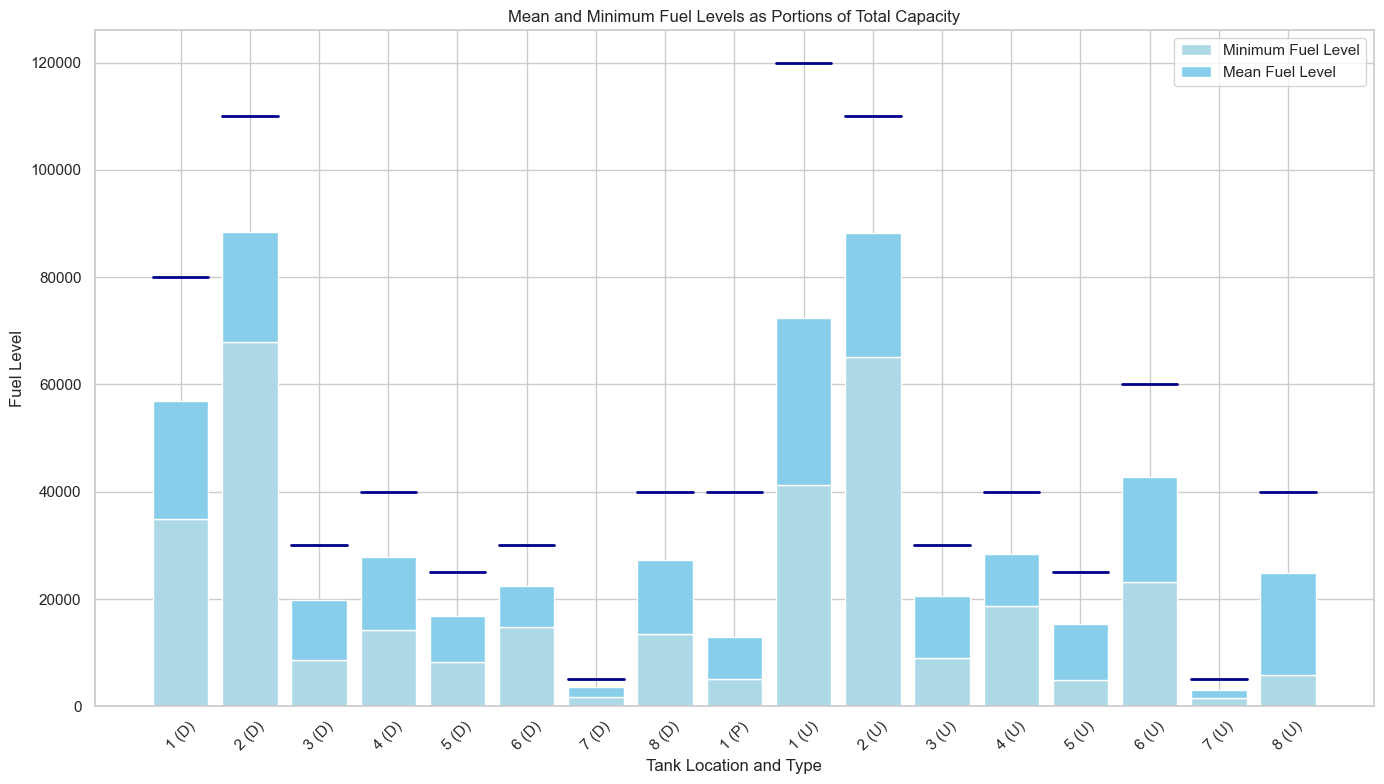

In [27]:
#But that's not enough...
# So we decided to plot mean, min and capacity together in one chart

merged_df['Mean_Min_Diff'] = merged_df['mean'] - merged_df['min']
positions = range(len(merged_df))
fig, ax = plt.subplots(figsize = (14, 8))

# Plotting the minimum segment
min_bars = ax.bar(positions, merged_df['min'], label = 'Minimum Fuel Level', color = 'lightblue')

# Plotting the mean segment on top of minimum
mean_bars = ax.bar(positions, merged_df['Mean_Min_Diff'], bottom = merged_df['min'], label = 'Mean Fuel Level', color = 'skyblue')

# Adding a line to represent the total capacity
for pos, capacity in zip(positions, merged_df['Total_Capacity']):
    plt.plot([pos - 0.4, pos + 0.4], [capacity, capacity], color = "darkblue", linewidth=2)

ax.set_xlabel('Tank Location and Type')
ax.set_ylabel('Fuel Level')
ax.set_title('Mean and Minimum Fuel Levels as Portions of Total Capacity')
ax.set_xticks(positions)
ax.set_xticklabels(merged_df['Tank Location'].astype(str) + ' (' + merged_df['Tank Type'] + ')', rotation = 45)
ax.legend()

fig.tight_layout()

plt.show()

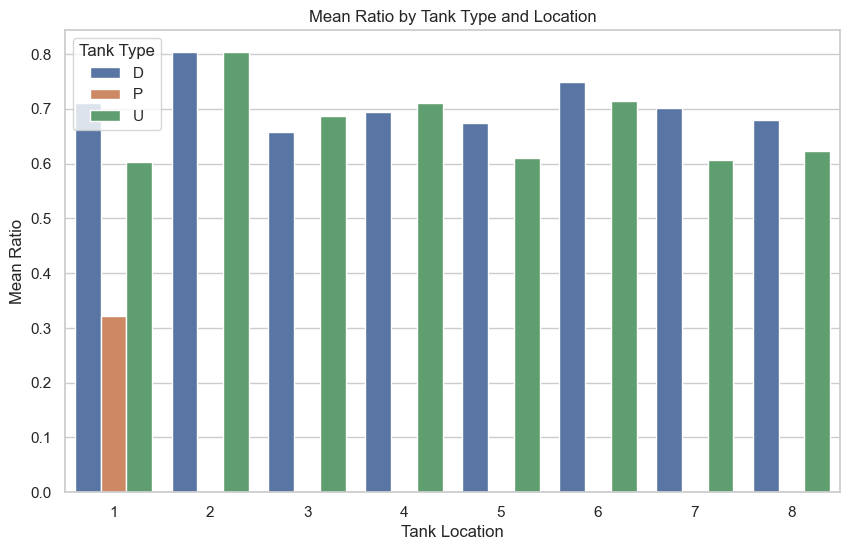

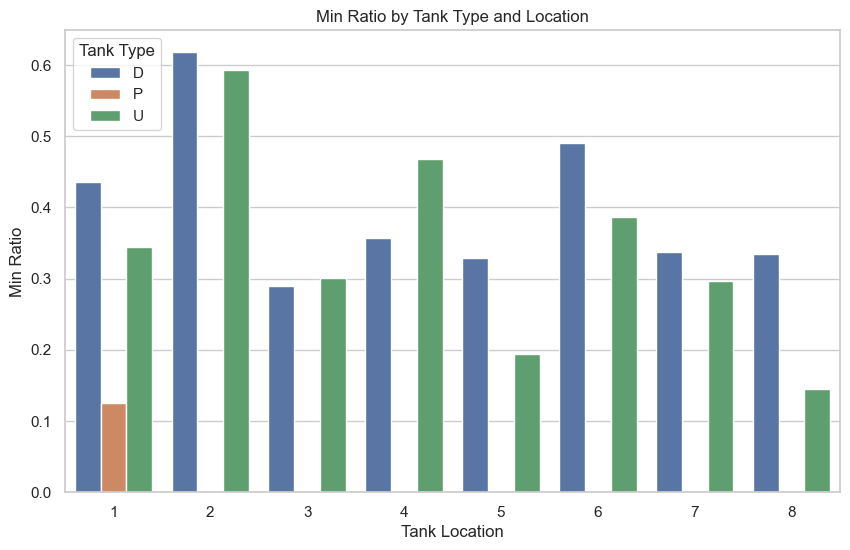

In [28]:
# We also want the mean and min ratio plotted
merged_df['Mean_Ratio'] = merged_df['mean'] / merged_df['Total_Capacity']
merged_df['Min_Ratio'] = merged_df['min'] / merged_df['Total_Capacity']

plt.figure(figsize=(10, 6))
sns.barplot(x='Tank Location', y='Mean_Ratio', hue='Tank Type', data=merged_df)
plt.title('Mean Ratio by Tank Type and Location')
plt.xlabel('Tank Location')
plt.ylabel('Mean Ratio')
plt.legend(title='Tank Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Tank Location', y='Min_Ratio', hue='Tank Type', data=merged_df)
plt.title('Min Ratio by Tank Type and Location')
plt.xlabel('Tank Location')
plt.ylabel('Min Ratio')
plt.legend(title='Tank Type')
plt.show()


In [29]:
# We want to learn more about daily change of fuel level
df_fuel_agg.sort_values(by=['Tank Type', 'Tank Location', 'Date'], inplace=True)
df_fuel_agg['Daily_Change'] = df_fuel_agg.groupby(['Tank Type', 'Tank Location'])['Total_Fuel_Level'].diff()
print(df_fuel_agg.head())

          Date Tank Type  Tank Location  Total_Fuel_Level  Daily_Change
0   2017-01-01         D              1          59894.00           NaN
15  2017-01-02         D              1          65618.00       5724.00
30  2017-01-03         D              1          60375.00      -5243.00
45  2017-01-04         D              1          52618.00      -7757.00
60  2017-01-05         D              1          53398.00        780.00


In [30]:
chg_stats = df_fuel_agg.groupby(['Tank Type', 'Tank Location'])['Daily_Change'].agg(['mean', 'max', 'min', 'count', 'std']).reset_index()

chg_stats.head(20)

,Tank Type,Tank Location,mean,max,min,count,std
0,D,1,6.33,31468.00,-14509.00,881,8136.40
1,D,2,29.78,26464.00,-10951.00,913,7344.80
2,D,3,-2.63,16917.00,-4668.00,717,2288.71
3,D,4,15.66,18102.00,-10126.00,880,4342.88
4,D,5,5.81,10656.00,-3978.00,912,2728.05
5,D,6,1.35,13040.00,-2707.00,900,860.51
6,D,7,1.00,2608.00,-316.00,736,181.42
7,D,8,9.59,12321.00,-1764.00,838,894.92
8,P,1,-0.40,19454.00,-15490.00,881,4244.43
9,U,1,16.30,38725.00,-27366.00,881,12788.02


In [31]:
# Now let's explore the invoices data

print(df_invoice.shape,
    df_invoice['Invoice ID'].nunique())
# No duplicate invoice

(2831, 6) 2831


In [32]:
df_invoice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2831 entries, 0 to 2872
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Invoice Date                  2831 non-null   object 
 1   Invoice ID                    2831 non-null   float64
 2   Invoice Gas Station Location  2831 non-null   int64  
 3   Gross Purchase Cost           2831 non-null   float64
 4   Amount Purchased              2831 non-null   float64
 5   Fuel Type                     2831 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 154.8+ KB


In [33]:
# Similarly, first we suppress the invoices in the same day
df_invoice['Date'] = pd.to_datetime(df_invoice['Invoice Date'])

daily_sums = df_invoice.groupby(['Date', 'Fuel Type', 'Invoice Gas Station Location']).agg({
    'Gross Purchase Cost': 'sum',
    'Amount Purchased': 'sum'
}).reset_index()

In [34]:
# Since the costs are money, we need to consider inflation rate.
# Here we are using the CA CPI we collected previously.
# To calculate the real cost, we first need to match date to month

daily_sums['Year_Month'] = daily_sums['Date'].dt.to_period('M')
df_cpi['Year_Month'] = df_cpi['Date'].dt.to_period('M')
daily_sums_with_cpi = pd.merge(daily_sums, df_cpi, on='Year_Month', how='left')
daily_sums_with_cpi.drop('Year_Month', axis=1, inplace=True)

In [35]:
# We are using 2019-08 as present/base
base_cpi = df_cpi[df_cpi['Date'] == '2019-08-01']['CPI'].iloc[0]
daily_sums_with_cpi['Real Gross Purchase Cost'] = daily_sums_with_cpi['Gross Purchase Cost'] * (base_cpi / daily_sums_with_cpi['CPI'])
daily_sums_with_cpi['Price Per Unit'] = daily_sums_with_cpi['Real Gross Purchase Cost'] / daily_sums_with_cpi['Amount Purchased']

In [36]:
daily_sums_with_cpi.head()

,Date_x,Fuel Type,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Date_y,CPI,Real Gross Purchase Cost,Price Per Unit
0,2017-01-02,D,1,12491.85,9338.74,2017-01-01,173.10,13105.26,1.40
1,2017-01-02,D,2,29651.12,22809.94,2017-01-01,173.10,31107.12,1.36
2,2017-01-02,D,4,11363.80,9139.20,2017-01-01,173.10,11921.82,1.30
3,2017-01-02,D,5,9573.30,7156.86,2017-01-01,173.10,10043.39,1.40
4,2017-01-02,G,1,7570.82,6609.60,2017-01-01,173.10,7942.58,1.20


In [37]:
# Then we get the stats
invoice_stats = daily_sums_with_cpi.groupby(['Fuel Type', 'Invoice Gas Station Location']).agg({
    'Real Gross Purchase Cost': ['count', 'min', 'max', 'mean', sum],
    'Amount Purchased': ['min', 'max', 'mean', 'sum'],
    'Price Per Unit' : ['min', 'max', 'mean']
}).reset_index()

# The multiindexes in columns have to be flattened
invoice_stats.columns = [' '.join(col).strip() for col in invoice_stats.columns.values]

invoice_stats.head(20)

,Fuel Type,Invoice Gas Station Location,Real Gross Purchase Cost count,Real Gross Purchase Cost min,Real Gross Purchase Cost max,Real Gross Purchase Cost mean,Real Gross Purchase Cost sum,Amount Purchased min,Amount Purchased max,Amount Purchased mean,Amount Purchased sum,Price Per Unit min,Price Per Unit max,Price Per Unit mean
0,D,1,450,3810.59,34690.80,13443.33,6049499.04,1321.44,30211.26,10827.68,4872458.03,0.98,3.26,1.33
1,D,2,226,5960.91,33446.82,18283.21,4132004.62,2687.87,30190.54,15313.72,3460899.81,0.98,3.26,1.26
2,D,3,41,7719.60,16112.85,12375.22,507383.93,4067.01,15971.98,10532.08,431815.12,0.98,2.06,1.20
3,D,4,183,3964.42,18999.28,11019.62,2016590.64,2642.88,17168.34,8920.59,1632468.43,0.99,2.88,1.32
4,D,5,125,672.01,11827.61,8163.26,1020407.44,506.56,11625.12,6493.87,811733.95,0.99,2.83,1.34
5,D,6,7,6825.01,13855.65,9692.18,67845.23,3763.58,11862.99,7804.28,54629.95,1.06,1.85,1.34
6,D,7,8,876.44,2723.27,1690.08,13520.61,319.71,2499.28,1385.28,11082.27,1.07,2.74,1.41
7,D,8,9,5032.50,25594.23,9973.30,89759.72,2657.89,24454.46,8450.09,76050.83,1.05,2.58,1.37
8,G,1,536,379.17,56004.55,23562.38,12629435.83,277.20,54440.62,20272.78,10866211.22,0.93,2.65,1.20
9,G,2,164,129.85,35332.02,19067.92,3127139.62,127.65,30675.31,17210.45,2822513.78,0.95,2.43,1.16


In [38]:
### Since D stands for diesel and G stands for Gasoline, we assume the D in invoice corresponds
### to fuel type D in tank, and G fuel type in invoice corresponds to U and P in tank. 

In [39]:
### Given the discount information, we wish to know to what extent 
### these gas stations were able to exploit the benefits

intervals = [0, 15000, 25000, 40000, float('inf')]
discounts_per_liter = [0, 0.02, 0.03, 0.04]

categories = pd.cut(daily_sums_with_cpi['Amount Purchased'], bins=intervals, right=False, labels=discounts_per_liter)

daily_sums_with_cpi['Discount per Liter'] = categories.astype(float)

daily_sums_with_cpi['Amount Saved'] = daily_sums_with_cpi['Amount Purchased'] * daily_sums_with_cpi['Discount per Liter']

daily_sums_with_cpi['Purchase Quantity Interval'] = pd.cut(daily_sums_with_cpi['Amount Purchased'], bins=intervals)

summary_stats = daily_sums_with_cpi.groupby(['Purchase Quantity Interval', 'Invoice Gas Station Location']).agg({
    'Invoice Gas Station Location': 'count',  # Count of invoices
    'Amount Saved': 'sum'  # Sum of amount saved
}).rename(columns={'Invoice Gas Station Location': 'Invoice Count'})

In [40]:
summary_stats.head(50)

Invoice Count  \
Purchase Quantity Interval Invoice Gas Station Location                  
(0.0, 15000.0]             1                                       616   
                           2                                       169   
                           3                                        74   
                           4                                       354   
                           5                                       278   
                           6                                        30   
                           7                                        52   
                           8                                        25   
(15000.0, 25000.0]         1                                       144   
                           2                                       197   
                           3                                         6   
                           4                                         1   
                           5                                         1   
                           6                                         7   
                           7                                         0   
                           8                                         3   
(25000.0, 40000.0]         1                                       195   
                           2                                        24   
                           3                                         0   
                           4                                         0   
                           5                                         0   
                           6                                         0   
                           7                                         0   
                           8                                         0   
(40000.0, inf]             1                                        31   
                           2                                         0   
                           3                                         0   
                           4                                         0   
                           5                                         0   
                           6                                         0   
                           7                                         0   
                           8                                         0   

                                                         Amount Saved  
Purchase Quantity Interval Invoice Gas Station Location                
(0.0, 15000.0]             1                                     0.00  
                           2                                     0.00  
                           3                                     0.00  
                           4                                     0.00  
                           5                                     0.00  
                           6                                     0.00  
                           7                                     0.00  
                           8                                     0.00  
(15000.0, 25000.0]         1                                 56132.65  
                           2                                 78712.51  
                           3                                  1955.05  
                           4                                   343.37  
                           5                                   369.52  
                           6                                  2727.68  
                           7                                     0.00  
                           8                                  1335.40  
(25000.0, 40000.0]         1                                184915.11  
                           2                                 19911.78  
                           3                                     0.00  
                           4

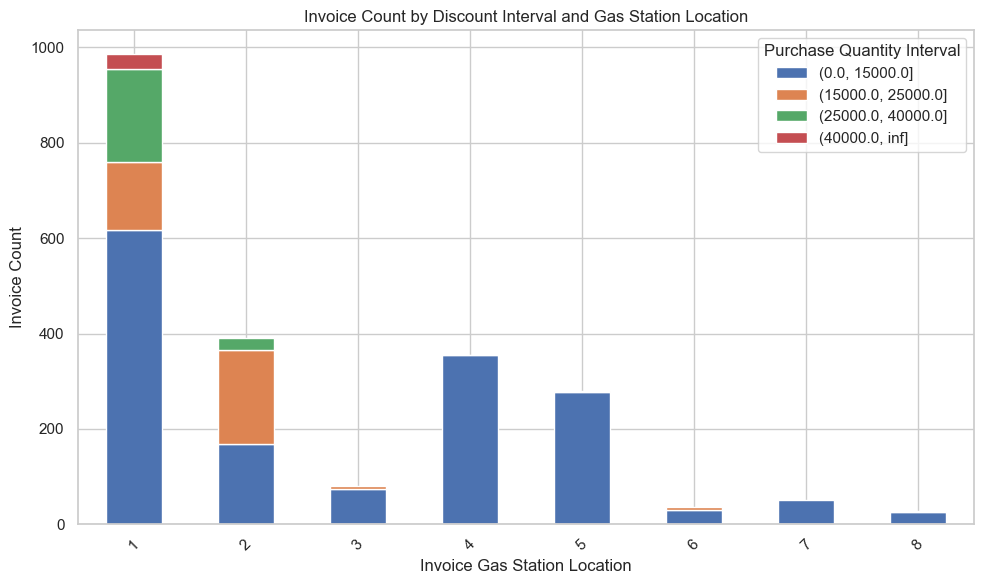

In [41]:
pivot_data = summary_stats.pivot_table(index='Invoice Gas Station Location', columns='Purchase Quantity Interval', values='Invoice Count', fill_value=0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Invoice Count by Discount Interval and Gas Station Location')
plt.xlabel('Invoice Gas Station Location')
plt.ylabel('Invoice Count')
plt.legend(title='Purchase Quantity Interval')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [42]:
# Here we use the absolute sum of daily change in fuel level to approximate the total flow at each gas station
df_fuel_agg.groupby(['Tank Type', 'Tank Location'])['Daily_Change'].apply(lambda c: c.abs().sum())

Tank Type  Tank Location
D          1               6181548.00
           2               5062285.00
           3                636981.00
           4               2750114.00
           5               1582694.00
           6                129303.00
           7                 25479.00
           8                143477.00
P          1               1949184.00
U          1               9467096.00
           2               4455597.00
           3                715022.00
           4               2500956.00
           5               2236514.00
           6                761730.00
           7                175427.00
           8                437078.00
Name: Daily_Change, dtype: float64

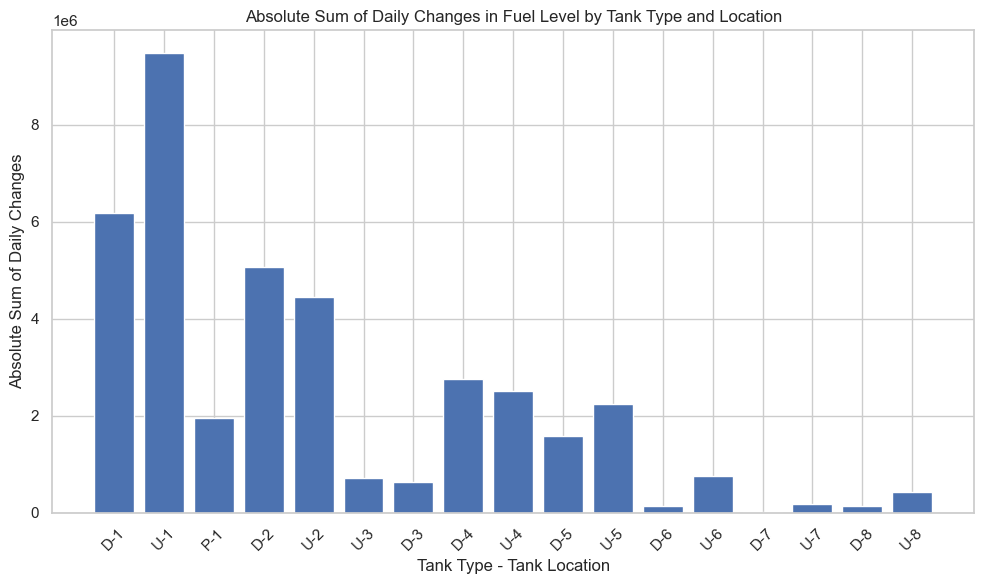

In [43]:
abs_sum_daily_changes = df_fuel_agg.groupby(['Tank Type', 'Tank Location'])['Daily_Change'].apply(lambda c: c.abs().sum()).reset_index(name='Absolute Sum of Daily Changes')

abs_sum_daily_changes_sorted = abs_sum_daily_changes.sort_values(by='Tank Location', ascending = True)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(abs_sum_daily_changes_sorted['Tank Type'] + '-' + abs_sum_daily_changes_sorted['Tank Location'].astype(str), abs_sum_daily_changes_sorted['Absolute Sum of Daily Changes'])
plt.xlabel('Tank Type - Tank Location')
plt.ylabel('Absolute Sum of Daily Changes')
plt.title('Absolute Sum of Daily Changes in Fuel Level by Tank Type and Location')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated abels
plt.show()

In [44]:
#

In [45]:

final_df = pd.merge(merged_df, chg_stats, on=['Tank Type', 'Tank Location'], how='left')
final_df = pd.merge(final_df, abs_sum_daily_changes, on=['Tank Type', 'Tank Location'], how='left')
final_df = final_df.rename(columns={
    'mean_x': 'mean_fuel_level',
    'min_x': 'min_fuel_level',
    'count_x': 'count_fuel_level',
    'mean_y': 'mean_chg',
    'max': 'max_chg',
    'min_y': 'min_chg',
    'count_y': 'count_chg',
    'std': 'std_chg'
})
# We believe mean absolute change is a better indicator compared to mena change
final_df['mean_abs_chg'] = final_df['Absolute Sum of Daily Changes'] / final_df['count_fuel_level']

final_df.drop('mean_chg', axis=1, inplace=True)

final_df.head(20)

,Tank Type,Tank Location,mean_fuel_level,min_fuel_level,count_fuel_level,Total_Capacity,Mean_Min_Diff,Mean_Ratio,Min_Ratio,max_chg,min_chg,count_chg,std_chg,Absolute Sum of Daily Changes,mean_abs_chg
0,D,1,56856.54,34884.00,882,80000,21972.54,0.71,0.44,31468.00,-14509.00,881,8136.40,6181548.00,7008.56
1,D,2,88354.75,67949.00,914,110000,20405.75,0.80,0.62,26464.00,-10951.00,913,7344.80,5062285.00,5538.61
2,D,3,19726.65,8688.00,718,30000,11038.65,0.66,0.29,16917.00,-4668.00,717,2288.71,636981.00,887.16
3,D,4,27798.29,14260.00,881,40000,13538.29,0.69,0.36,18102.00,-10126.00,880,4342.88,2750114.00,3121.58
4,D,5,16873.37,8238.00,913,25000,8635.37,0.67,0.33,10656.00,-3978.00,912,2728.05,1582694.00,1733.51
5,D,6,22470.72,14696.00,901,30000,7774.72,0.75,0.49,13040.00,-2707.00,900,860.51,129303.00,143.51
6,D,7,3508.87,1684.00,737,5000,1824.87,0.70,0.34,2608.00,-316.00,736,181.42,25479.00,34.57
7,D,8,27214.36,13405.00,839,40000,13809.36,0.68,0.34,12321.00,-1764.00,838,894.92,143477.00,171.01
8,P,1,12858.62,5039.00,882,40000,7819.62,0.32,0.13,19454.00,-15490.00,881,4244.43,1949184.00,2209.96
9,U,1,72314.67,41233.00,882,120000,31081.67,0.60,0.34,38725.00,-27366.00,881,12788.02,9467096.00,10733.67


In [46]:
### We determine that the safety fuel level could be mean_abs_chg + 2 times standard deviation
### Since the the std_chg is calculated using both positive and negative values and 
### mean is calcualted using absolute value, this result is definitely not statistically perfect.
### But the std_chg can only be larger than the actual std of daily outflow. So mean + 2 time std
### is enough here. There is more than 95% chance the next day out flow would be smaller,


In [47]:
### Calcualting safety level
final_df['safety_level'] = final_df['mean_abs_chg'] + 2 * final_df['std_chg']
final_df['safety_level']

0    23281.36
1    20228.20
2     5464.59
3    11807.33
4     7189.62
5     1864.52
6      397.40
7     1960.85
8    10698.82
9    36309.70
10   18985.98
11    6128.11
12   10623.81
13    9519.37
14    5965.72
15    1317.13
16    4164.17
Name: safety_level, dtype: float64

In [48]:
### The room between safety level and capacity is the amount the company can order
final_df['Capacity_After_Safety'] = final_df['Total_Capacity'] - final_df['safety_level']

In [49]:
# We used a function to round to the lower discount interval cutoff. And use the capacity - rounded value
# as the replenishment level. this way,we can fully exploit the benefits of discount policies while also 
# maintain a higher safety level.
def round_to_interval(value):
    if value < 15000:
        return value  # Keep original value if less than 15000
    elif 15000 <= value < 25000:
        return 15000
    elif 25000 <= value < 40000:
        return 25000
    elif value >= 40000:
        return 40000

final_df['Replenish Amount'] = final_df['Capacity_After_Safety'].apply(round_to_interval)
final_df['Replenish Fuel Level'] = final_df['Total_Capacity'] - final_df['Replenish Amount']
final_df.head(20)

,Tank Type,Tank Location,mean_fuel_level,min_fuel_level,count_fuel_level,Total_Capacity,Mean_Min_Diff,Mean_Ratio,Min_Ratio,max_chg,min_chg,count_chg,std_chg,Absolute Sum of Daily Changes,mean_abs_chg,safety_level,Capacity_After_Safety,Replenish Amount,Replenish Fuel Level
0,D,1,56856.54,34884.00,882,80000,21972.54,0.71,0.44,31468.00,-14509.00,881,8136.40,6181548.00,7008.56,23281.36,56718.64,40000.00,40000.00
1,D,2,88354.75,67949.00,914,110000,20405.75,0.80,0.62,26464.00,-10951.00,913,7344.80,5062285.00,5538.61,20228.20,89771.80,40000.00,70000.00
2,D,3,19726.65,8688.00,718,30000,11038.65,0.66,0.29,16917.00,-4668.00,717,2288.71,636981.00,887.16,5464.59,24535.41,15000.00,15000.00
3,D,4,27798.29,14260.00,881,40000,13538.29,0.69,0.36,18102.00,-10126.00,880,4342.88,2750114.00,3121.58,11807.33,28192.67,25000.00,15000.00
4,D,5,16873.37,8238.00,913,25000,8635.37,0.67,0.33,10656.00,-3978.00,912,2728.05,1582694.00,1733.51,7189.62,17810.38,15000.00,10000.00
5,D,6,22470.72,14696.00,901,30000,7774.72,0.75,0.49,13040.00,-2707.00,900,860.51,129303.00,143.51,1864.52,28135.48,25000.00,5000.00
6,D,7,3508.87,1684.00,737,5000,1824.87,0.70,0.34,2608.00,-316.00,736,181.42,25479.00,34.57,397.40,4602.60,4602.60,397.40
7,D,8,27214.36,13405.00,839,40000,13809.36,0.68,0.34,12321.00,-1764.00,838,894.92,143477.00,171.01,1960.85,38039.15,25000.00,15000.00
8,P,1,12858.62,5039.00,882,40000,7819.62,0.32,0.13,19454.00,-15490.00,881,4244.43,1949184.00,2209.96,10698.82,29301.18,25000.00,15000.00
9,U,1,72314.67,41233.00,882,120000,31081.67,0.60,0.34,38725.00,-27366.00,881,12788.02,9467096.00,10733.67,36309.70,83690.30,40000.00,80000.00


In [50]:
# Function to calculate savings
def calculate_savings(replenish_amount):
    if replenish_amount < 15000:
        discount_per_liter = 0
    elif 15000 <= replenish_amount < 25000:
        discount_per_liter = 0.02
    elif 25000 <= replenish_amount < 40000:
        discount_per_liter = 0.03
    elif replenish_amount >= 40000:
        discount_per_liter = 0.04
    
    savings = replenish_amount * discount_per_liter
    return savings

In [51]:
final_df['Replenish Savings'] = final_df['Replenish Amount'].apply(calculate_savings)

# To calculate the total savings, we need to merge invoice_stats with a part of final_df,
# as previously assumed, we map U and P to fuel type G and aggregate the values

final_df['Grouped Tank Type'] = final_df['Tank Type'].replace({'U': 'G', 'P': 'G'})

final_df_aggregated = final_df.groupby(['Tank Location', 'Grouped Tank Type']).agg({
    'Replenish Savings': 'sum',
    'Replenish Amount': 'sum'
}).reset_index()

final_df_aggregated.rename(columns={'Tank Location': 'Invoice Gas Station Location', 'Grouped Tank Type' : 'Fuel Type'}, inplace=True)
invoice_stats_enhanced = pd.merge(invoice_stats, final_df_aggregated, on=['Invoice Gas Station Location', 'Fuel Type'], how='left')

invoice_stats_enhanced['Total Savings'] = invoice_stats_enhanced['Amount Purchased sum'] / invoice_stats_enhanced['Replenish Amount'] * invoice_stats_enhanced['Replenish Savings']
invoice_stats_enhanced.head(20)

,Fuel Type,Invoice Gas Station Location,Real Gross Purchase Cost count,Real Gross Purchase Cost min,Real Gross Purchase Cost max,Real Gross Purchase Cost mean,Real Gross Purchase Cost sum,Amount Purchased min,Amount Purchased max,Amount Purchased mean,Amount Purchased sum,Price Per Unit min,Price Per Unit max,Price Per Unit mean,Replenish Savings,Replenish Amount,Total Savings
0,D,1,450,3810.59,34690.80,13443.33,6049499.04,1321.44,30211.26,10827.68,4872458.03,0.98,3.26,1.33,1600.00,40000.00,194898.32
1,D,2,226,5960.91,33446.82,18283.21,4132004.62,2687.87,30190.54,15313.72,3460899.81,0.98,3.26,1.26,1600.00,40000.00,138435.99
2,D,3,41,7719.60,16112.85,12375.22,507383.93,4067.01,15971.98,10532.08,431815.12,0.98,2.06,1.20,300.00,15000.00,8636.30
3,D,4,183,3964.42,18999.28,11019.62,2016590.64,2642.88,17168.34,8920.59,1632468.43,0.99,2.88,1.32,750.00,25000.00,48974.05
4,D,5,125,672.01,11827.61,8163.26,1020407.44,506.56,11625.12,6493.87,811733.95,0.99,2.83,1.34,300.00,15000.00,16234.68
5,D,6,7,6825.01,13855.65,9692.18,67845.23,3763.58,11862.99,7804.28,54629.95,1.06,1.85,1.34,750.00,25000.00,1638.90
6,D,7,8,876.44,2723.27,1690.08,13520.61,319.71,2499.28,1385.28,11082.27,1.07,2.74,1.41,0.00,4602.60,0.00
7,D,8,9,5032.50,25594.23,9973.30,89759.72,2657.89,24454.46,8450.09,76050.83,1.05,2.58,1.37,750.00,25000.00,2281.52
8,G,1,536,379.17,56004.55,23562.38,12629435.83,277.20,54440.62,20272.78,10866211.22,0.93,2.65,1.20,2350.00,65000.00,392855.33
9,G,2,164,129.85,35332.02,19067.92,3127139.62,127.65,30675.31,17210.45,2822513.78,0.95,2.43,1.16,1600.00,40000.00,112900.55


In [52]:
# The imrpovements os using new replenish policy
print(summary_stats['Amount Saved'].sum(),
invoice_stats_enhanced['Total Savings'].sum())
print(invoice_stats_enhanced['Total Savings'].sum() - summary_stats['Amount Saved'].sum())
print(invoice_stats_enhanced['Total Savings'].sum() / summary_stats['Amount Saved'].sum() - 1)

400713.09968000004 1021318.2930584615
620605.1933784615
1.5487519471513709


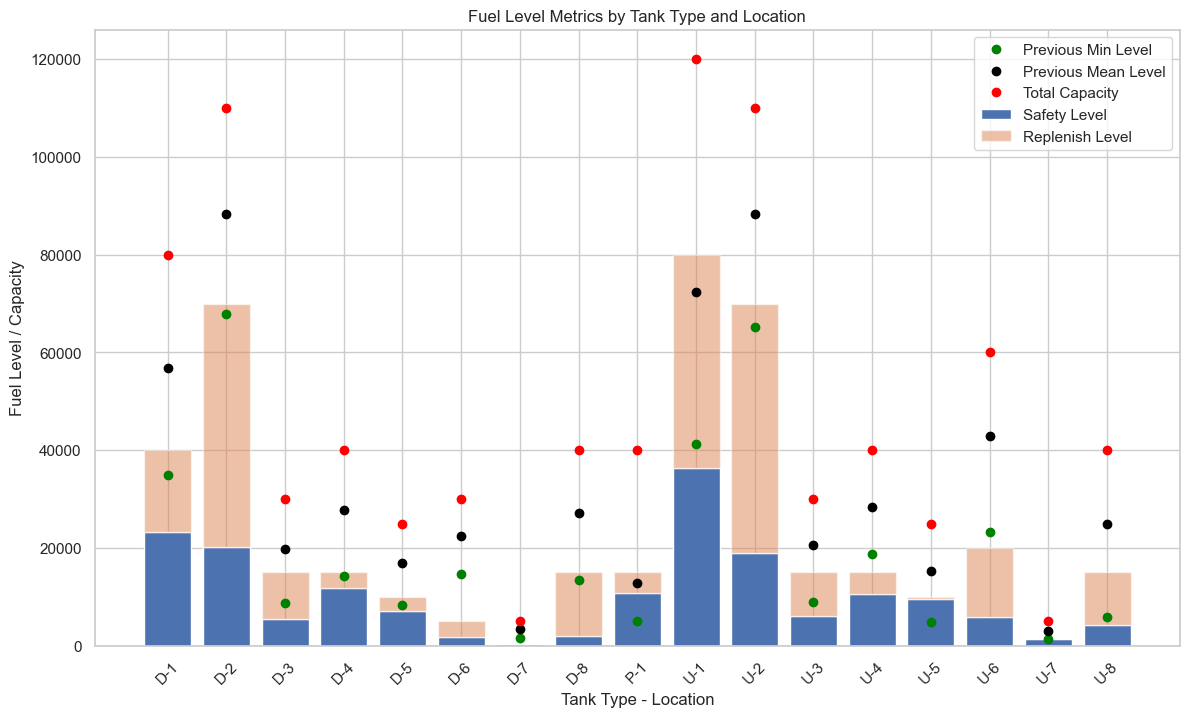

In [53]:
## A comprehensive graph
categories = final_df['Tank Type'] + '-' + final_df['Tank Location'].astype(str)
x = np.arange(len(categories)) 

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(x, final_df['safety_level'], label='Safety Level')
ax.bar(x, final_df['Replenish Fuel Level'] - final_df['safety_level'], bottom=final_df['safety_level'], label='Replenish Level', alpha=0.5)
ax.plot(x, final_df['min_fuel_level'], label='Previous Min Level', color='green', marker='o', linestyle='None')
ax.plot(x, final_df['mean_fuel_level'], label='Previous Mean Level', color='black', marker='o', linestyle='None')
ax.plot(x, final_df['Total_Capacity'], label='Total Capacity', color='red', marker='o', linestyle='None')

ax.set_xlabel('Tank Type - Location')
ax.set_ylabel('Fuel Level / Capacity')
ax.set_title('Fuel Level Metrics by Tank Type and Location')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

plt.show()

In [54]:
invoice_stats['Real Gross Purchase Cost sum'].sum()

34193813.58550044

In [55]:
(invoice_stats_enhanced['Total Savings'].sum() - summary_stats['Amount Saved'].sum()) / invoice_stats['Real Gross Purchase Cost sum'].sum()
### Comapred to the total cost, the improvement is minor

0.01814963375835982

In [56]:
## But when compared to old savings
agg_savings = daily_sums_with_cpi.groupby(['Fuel Type', 'Invoice Gas Station Location']).agg({
    'Amount Saved': 'sum' 
})

comparison_df = pd.merge(agg_savings, invoice_stats_enhanced, on=['Fuel Type', 'Invoice Gas Station Location'], how='outer')
comparison_df

,Fuel Type,Invoice Gas Station Location,Amount Saved,Real Gross Purchase Cost count,Real Gross Purchase Cost min,Real Gross Purchase Cost max,Real Gross Purchase Cost mean,Real Gross Purchase Cost sum,Amount Purchased min,Amount Purchased max,Amount Purchased mean,Amount Purchased sum,Price Per Unit min,Price Per Unit max,Price Per Unit mean,Replenish Savings,Replenish Amount,Total Savings
0,D,1,35772.02,450,3810.59,34690.80,13443.33,6049499.04,1321.44,30211.26,10827.68,4872458.03,0.98,3.26,1.33,1600.00,40000.00,194898.32
1,D,2,48384.59,226,5960.91,33446.82,18283.21,4132004.62,2687.87,30190.54,15313.72,3460899.81,0.98,3.26,1.26,1600.00,40000.00,138435.99
2,D,3,319.44,41,7719.60,16112.85,12375.22,507383.93,4067.01,15971.98,10532.08,431815.12,0.98,2.06,1.20,300.00,15000.00,8636.30
3,D,4,343.37,183,3964.42,18999.28,11019.62,2016590.64,2642.88,17168.34,8920.59,1632468.43,0.99,2.88,1.32,750.00,25000.00,48974.05
4,D,5,0.00,125,672.01,11827.61,8163.26,1020407.44,506.56,11625.12,6493.87,811733.95,0.99,2.83,1.34,300.00,15000.00,16234.68
5,D,6,0.00,7,6825.01,13855.65,9692.18,67845.23,3763.58,11862.99,7804.28,54629.95,1.06,1.85,1.34,750.00,25000.00,1638.90
6,D,7,0.00,8,876.44,2723.27,1690.08,13520.61,319.71,2499.28,1385.28,11082.27,1.07,2.74,1.41,0.00,4602.60,0.00
7,D,8,489.09,9,5032.50,25594.23,9973.30,89759.72,2657.89,24454.46,8450.09,76050.83,1.05,2.58,1.37,750.00,25000.00,2281.52
8,G,1,259585.77,536,379.17,56004.55,23562.38,12629435.83,277.20,54440.62,20272.78,10866211.22,0.93,2.65,1.20,2350.00,65000.00,392855.33
9,G,2,50239.70,164,129.85,35332.02,19067.92,3127139.62,127.65,30675.31,17210.45,2822513.78,0.95,2.43,1.16,1600.00,40000.00,112900.55


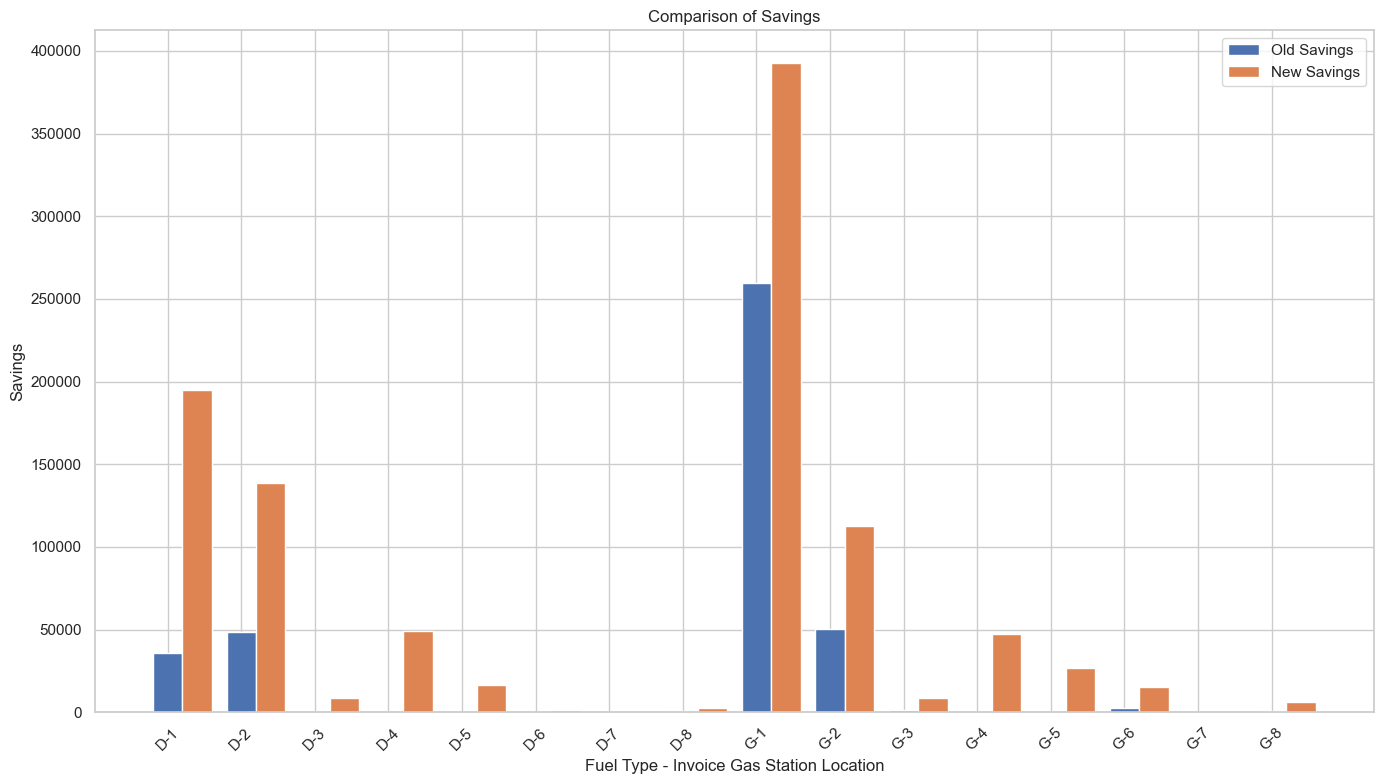

In [57]:
# The new policy is a huge improvement!
positions = range(len(comparison_df))

categories = comparison_df['Fuel Type'] + '-' + comparison_df['Invoice Gas Station Location'].astype(str)
x = np.arange(len(categories)) 

plt.figure(figsize=(14, 8))

plt.bar(x, comparison_df['Amount Saved'], width=0.4, label='Old Savings', align='center')
plt.bar([p + 0.4 for p in positions], comparison_df['Total Savings'], width=0.4, label='New Savings', align='center')


plt.xlabel('Fuel Type - Invoice Gas Station Location')
plt.ylabel('Savings')
plt.title('Comparison of Savings')
plt.xticks(x, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()